# COVID19 Project

In [10]:
import pandas as pd, matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta

#dtype changed to category from object to optimize runtime
df =  pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", dtype={'county': 'category', 
                                                                                                           'state': 'category'})
df.date = pd.to_datetime(df.date)

df['cases_diff'] = df.groupby(['county', 'state'])['cases'].diff()
df['deaths_diff'] = df.groupby(['county', 'state'])['deaths'].diff()

df.set_index(df.date, inplace=True, drop=True)
df.drop(columns=['date'], inplace=True)
df.index = df.index.astype('datetime64[ns]')
df.sort_index(ascending=False, inplace=True)

In [28]:
states = df.state.unique().tolist()
counties = df.county.unique().tolist()
fips = df.fips.unique().tolist()
total_cases = df.xs(df.index[0])['cases'].sum()
total_deaths = df.xs(df.index[0])['deaths'].sum()

def greatest_cases_yesterday():
    gcy = df.sort_values(by=['date', 'cases_diff'], ascending=False)
    return gcy.xs(df.index[0])

def greatest_deaths_yesterday():
    gdy = df.sort_values(by=['date', 'deaths_diff'], ascending=False)
    return gdy.xs(df.index[0])

def county_df(county, state=None):
    county_df = df[df['county'] == county].drop(columns=['county'])
    
    if state is not None:
        county_df = df[(df.county == county) & (df.state == state)]
        return county_df
    
    if county in states:
        return "{0} is not a county but a state.".format(county)
    
    also_in = county_df.state.unique()
    num_counties = len(also_in)
    
    if num_counties == 1:
        county_df.drop(columns=['state', 'fips'], axis=1, inplace=True)
        
    if num_counties > 1:
        return "{0} appears in {1}; please specify.".format(county, also_in)
    
    return county_df


def state_df(state):
    if state not in states:
        return "{0} is not in database.".format(state)
    
    sdf = df[df.state == state].copy()
    
    counties = sdf.county.unique()
    
    sdf.sort_index(ascending=False, inplace=True)
    sdf.drop(columns=['fips'], inplace=True)
    return sdf


def daily_totals(state=None):
    if state is None:
        index = df.index.unique()
        data = {'cases': [df.xs(i)['cases_diff'].sum() for i in index],
               'deaths': [df.xs(i)['deaths_diff'].sum() for i in index]}
        df2 = pd.DataFrame(data, index)

    if state:
        index = state_df(state).index.unique()
        data = {'cases': [state_df(state).xs(i)['cases_diff'].sum() for i in index],
               'deaths': [state_df(state).xs(i)['deaths_diff'].sum() for i in index]}
        df2 = pd.DataFrame(data, index)
        return df2
    else:
        return df2
    

def yesterday():
    #yest = (dt.now() - timedelta(days=1)).strftime('%D')
    cases_max = daily_totals()['cases'].idxmax().strftime("%D")
    deaths_max = daily_totals()['deaths'].idxmax().strftime("%D")
    cases = df.xs(df.index[0])['cases_diff'].sum()
    deaths = df.xs(df.index[0])['deaths_diff'].sum()
    date =  df.index[0].strftime('%D')
    
    if date == cases_max:
        return "{0} cases and {1} deaths on {2}, the US's record for daily cases.".format(cases, deaths, date)
    
    if date == deaths_max:
        return "{0} cases and {1} deaths on {2}, the US's record for daily deaths.".format(cases, deaths, date)
    
    if date == cases_max and date == deaths_max:
        return "{0} cases and {1} deaths on {2}, the US's record for daily cases and deaths.".format(cases, deaths, date)
    
    else:
        return "{0} cases and {1} deaths on {2}".format(cases, deaths, date)

def state_yest():
    index = states
    data = {'cases': [state_df(state).xs(df.index[0])['cases_diff'].sum() for state in states],
            'deaths': [state_df(state).xs(df.index[0])['deaths_diff'].sum() for state in states]}
    df3 = pd.DataFrame(data, index)
    return df3

def monthly_df():
    m_index = df.index.month.unique()
    m_data = {'monthly cases': [df[df.index.month == month]['cases_diff'].sum() for month in m_index],
              'monthly deaths': [df[df.index.month == month]['deaths_diff'].sum() for month in m_index]}
    monthly_df = pd.DataFrame(m_data, m_index)
    monthly_df.index.rename('month', inplace=True)
    return monthly_df

def weekly_df():
    w_index = df.index.isocalendar().week.unique()
    w_data = {'weekly cases': [df[df.index.isocalendar().week == i]['cases_diff'].sum() for i in w_index],
              'weekly deaths': [df[df.index.isocalendar().week == i]['deaths_diff'].sum() for i in w_index]}
    weekly_df = pd.DataFrame(w_data, w_index)
    return weekly_df


# add days since max
# optional input for state and county
# how to handle two optional inputs? 
def max(county=None, state=None):
    pass
# yest = (dt.now() - timedelta(days=1)).strftime('%D')
# cases_max was on this day, x days ago
# deaths_max was on this day, x days ago

In [12]:
yesterday()

'207444.0 cases and 2259.0 deaths on 12/12/20'

In [30]:
weekly_df()

,weekly cases,weekly deaths
50,1356998.0,15658.0
49,1380238.0,15555.0
48,1134127.0,10161.0
47,1199731.0,10514.0
46,1052521.0,8035.0
45,783697.0,7389.0
44,580267.0,5763.0
43,489173.0,5633.0
42,398390.0,4920.0
41,370208.0,5013.0


In [75]:
daily_totals()['cases'].idxmax().strftime("%D"), daily_totals()['deaths'].idxmax().strftime("%D")

('12/11/20', '12/09/20')

In [10]:
d1 = dt.now()
d2 = daily_totals()['deaths'].idxmax()
delta = d1 - d2

In [11]:
delta.days 

3

In [14]:
index = states
data = {'cases': [state_df(state).xs(df.index[0])['cases_diff'].sum() for state in states],
        'deaths': [state_df(state).xs(df.index[0])['deaths_diff'].sum() for state in states]}
df3 = pd.DataFrame(data, index)

In [15]:
df3.sort_values(['cases'], ascending=False)

,cases,deaths
California,33665.0,170.0
Texas,13143.0,240.0
Pennsylvania,12021.0,227.0
Ohio,11738.0,111.0
Florida,11335.0,129.0
Illinois,11146.0,231.0
New York,10257.0,85.0
Georgia,7503.0,53.0
Indiana,6536.0,97.0
Michigan,6363.0,196.0


In [20]:
for month in df.index.strftime("%B").unique():
    print(month)

December
November
October
September
August
July
June
May
April
March
February
January


In [21]:
for month in df.index.month.unique():
    print(month, df[df.index.month == month]['cases_diff'].sum())

12 2081837.0
11 4412061.0
10 1946627.0
9 1217119.0
8 1473763.0
7 1917749.0
6 852437.0
5 721813.0
4 886531.0
3 185327.0
2 34.0
1 1.0


In [4]:
m_index = df.index.month.unique()
m_data = {'monthly cases': [df[df.index.month == month]['cases_diff'].sum() for month in m_index],
         'monthly deaths': [df[df.index.month == month]['deaths_diff'].sum() for month in m_index]}
m_df = pd.DataFrame(m_data, m_index)
m_df.index.rename('month', inplace=True)

In [31]:
m_df

,monthly cases,monthly deaths
month,,
12,2569475.0,29948.0
11,4412061.0,37791.0
10,1946627.0,23653.0
9,1217119.0,23376.0
8,1473763.0,29612.0
7,1917749.0,26404.0
6,852437.0,23081.0
5,721813.0,41229.0
4,886531.0,60017.0


In [7]:
w_index = df.index.isocalendar().week.unique()
w_data = {'weekly cases': [df[df.index.isocalendar().week == i]['cases_diff'].sum() for i in w_index],
         'weekly deaths': [df[df.index.isocalendar().week == i]['deaths_diff'].sum() for i in w_index]}
week_df = pd.DataFrame(w_data, w_index)

In [32]:
weekly_df()

,weekly cases,weekly deaths
50,1356998.0,15658.0
49,1380238.0,15555.0
48,1134127.0,10161.0
47,1199731.0,10514.0
46,1052521.0,8035.0
45,783697.0,7389.0
44,580267.0,5763.0
43,489173.0,5633.0
42,398390.0,4920.0
41,370208.0,5013.0


In [27]:
for week in df.index.isocalendar().week.unique():
    print(week, df[df.index.isocalendar().week == week]['cases_diff'].sum())

50 1149554.0
49 1380238.0
48 1134127.0
47 1199731.0
46 1052521.0
45 783697.0
44 580267.0
43 489173.0
42 398390.0
41 370208.0
40 305972.0
39 313471.0
38 287735.0
37 245475.0
36 283766.0
35 295135.0
34 296183.0
33 361201.0
32 377139.0
31 434918.0
30 458787.0
29 465424.0
28 407471.0
27 346667.0
26 271399.0
25 187867.0
24 151167.0
23 154104.0
22 147870.0
21 157697.0
20 157061.0
19 169385.0
18 194502.0
17 213367.0
16 199454.0
15 219768.0
14 194865.0
13 108172.0
12 28537.0
11 2630.0
10 351.0
9 41.0
8 3.0
7 1.0
6 0.0
5 2.0
4 0.0


In [29]:
df[df.index.isocalendar().week == df.index.isocalendar().week[-1]]

,county,state,fips,cases,deaths,cases_diff,deaths_diff
date,,,,,,,
2020-01-26,Snohomish,Washington,53061.0,1,0.0,0.0,0.0
2020-01-26,Cook,Illinois,17031.0,1,0.0,0.0,0.0
2020-01-26,Orange,California,6059.0,1,0.0,0.0,0.0
2020-01-26,Los Angeles,California,6037.0,1,0.0,NaN,NaN
2020-01-26,Maricopa,Arizona,4013.0,1,0.0,NaN,NaN
2020-01-25,Snohomish,Washington,53061.0,1,0.0,0.0,0.0
2020-01-25,Cook,Illinois,17031.0,1,0.0,0.0,0.0
2020-01-25,Orange,California,6059.0,1,0.0,NaN,NaN
2020-01-24,Snohomish,Washington,53061.0,1,0.0,0.0,0.0


#### Alternate method for finding total cases:

In [30]:
df[df.index.dayofyear == df.index.dayofyear.max()]['cases'].sum()

15696954

##### last day of the first week

In [31]:
df[df.index.isocalendar().week == df.index.isocalendar().week[-1]].index.max().date()

datetime.date(2020, 1, 26)

In [32]:
df.index[0].strftime("%D"), state_df('New Jersey').xs(df.index[0])['cases_diff'].sum(), state_df('New Jersey').xs(df.index[0])['deaths_diff'].sum()

('12/10/20', 5120.0, 66.0)

<AxesSubplot:xlabel='date'>

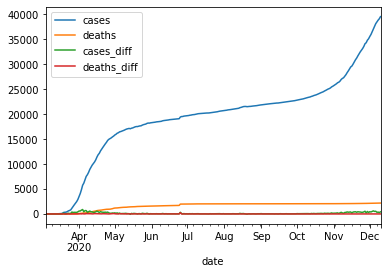

In [33]:
county_df("Bergen").plot()

<AxesSubplot:xlabel='date'>

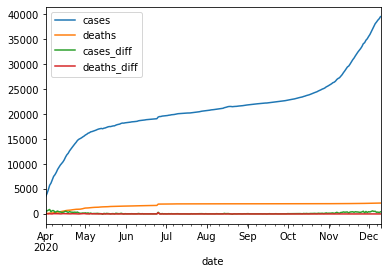

In [34]:
df[(df.index.month >= 4) & (df.state == 'New Jersey') & (df.county == 'Bergen')].drop(columns=['fips']).plot()

In [35]:
county_df("Bergen")

,cases,deaths,cases_diff,deaths_diff
date,,,,
2020-12-10,39557,2187.0,424.0,7.0
2020-12-09,39133,2180.0,279.0,8.0
2020-12-08,38854,2172.0,375.0,7.0
2020-12-07,38479,2165.0,334.0,0.0
2020-12-06,38145,2165.0,543.0,0.0
...,...,...,...,...
2020-03-08,4,0.0,1.0,0.0
2020-03-07,3,0.0,0.0,0.0
2020-03-06,3,0.0,1.0,0.0


In [48]:
state_df("New Jersey").index[-1].strftime("%D")

'03/04/20'

In [49]:
county_df("New York City")['cases_diff'].idxmax().strftime("%D"), county_df("New York City")['cases_diff'].max()

('04/15/20', 8021.0)

<AxesSubplot:xlabel='date'>

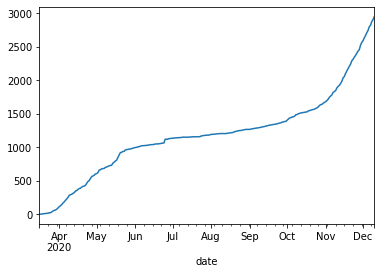

In [39]:
county_df("Hunterdon")['cases'].plot()

In [40]:
county_df("Hunterdon")

,cases,deaths,cases_diff,deaths_diff
date,,,,
2020-12-10,2947,133.0,45.0,0.0
2020-12-09,2902,133.0,30.0,0.0
2020-12-08,2872,133.0,53.0,1.0
2020-12-07,2819,132.0,23.0,0.0
2020-12-06,2796,132.0,55.0,0.0
...,...,...,...,...
2020-03-20,11,0.0,3.0,0.0
2020-03-19,8,0.0,2.0,0.0
2020-03-18,6,0.0,2.0,0.0
